networkx  : NetworkX is a powerful Python library used to create, analyze, and visualize graphs (also called networks).

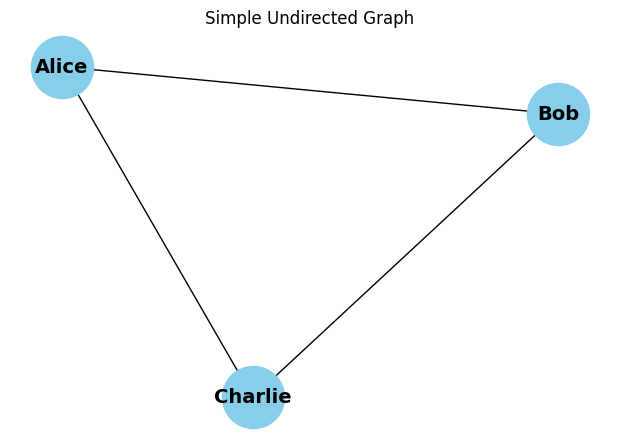

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()  

G.add_node("Alice")
G.add_node("Bob")
G.add_node("Charlie")

G.add_edge("Alice", "Bob")
G.add_edge("Bob", "Charlie")
G.add_edge("Alice", "Charlie")

plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=14, font_weight='bold')
plt.title("Simple Undirected Graph")
plt.show()


d:\shy_hr_chatbot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


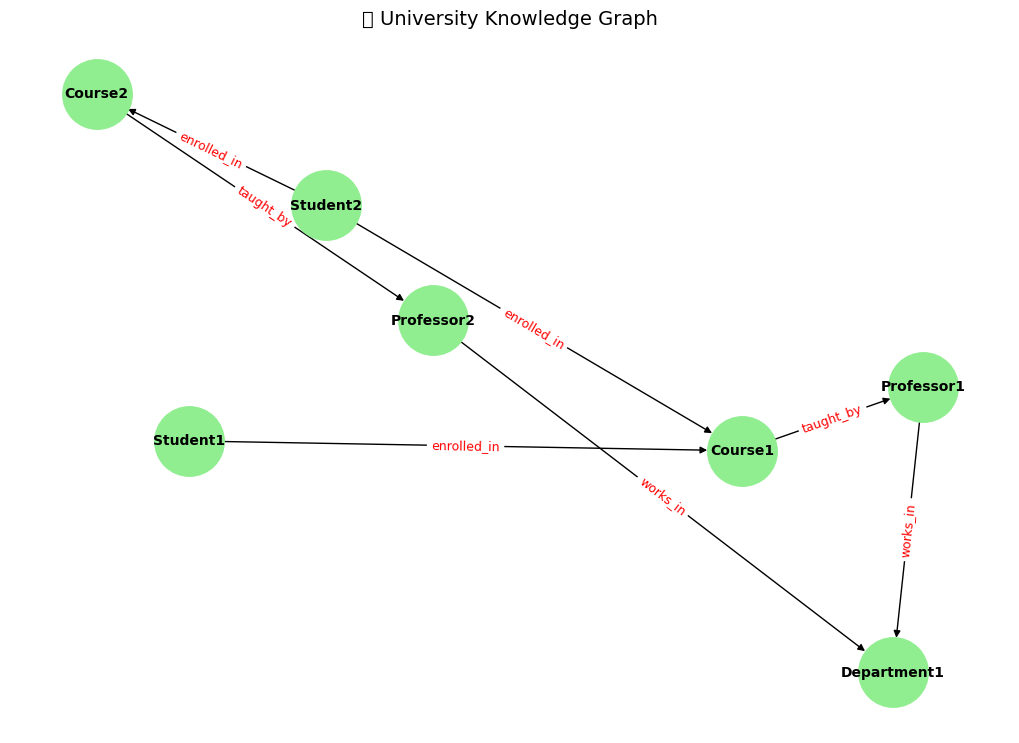

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes
G.add_node("Student1")
G.add_node("Student2")
G.add_node("Course1")
G.add_node("Course2")
G.add_node("Professor1")
G.add_node("Professor2")
G.add_node("Department1")

# edge
edges = [
    ("Student1", "Course1", "enrolled_in"),
    ("Student2", "Course1", "enrolled_in"),
    ("Student2", "Course2", "enrolled_in"),
    ("Course1", "Professor1", "taught_by"),
    ("Course2", "Professor2", "taught_by"),
    ("Professor1", "Department1", "works_in"),
    ("Professor2", "Department1", "works_in")
]

for src, dst, label in edges:
    G.add_edge(src, dst, label=label)

pos = nx.spring_layout(G, seed=42)  
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2500, font_size=10, font_weight='bold', arrows=True)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

plt.title("🎓 University Knowledge Graph", fontsize=14)
plt.axis('off')
plt.show()


In [4]:
# Orders → Customers → Countries  
# Orders → Products → Categories  
# Orders → Payments


d:\shy_hr_chatbot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


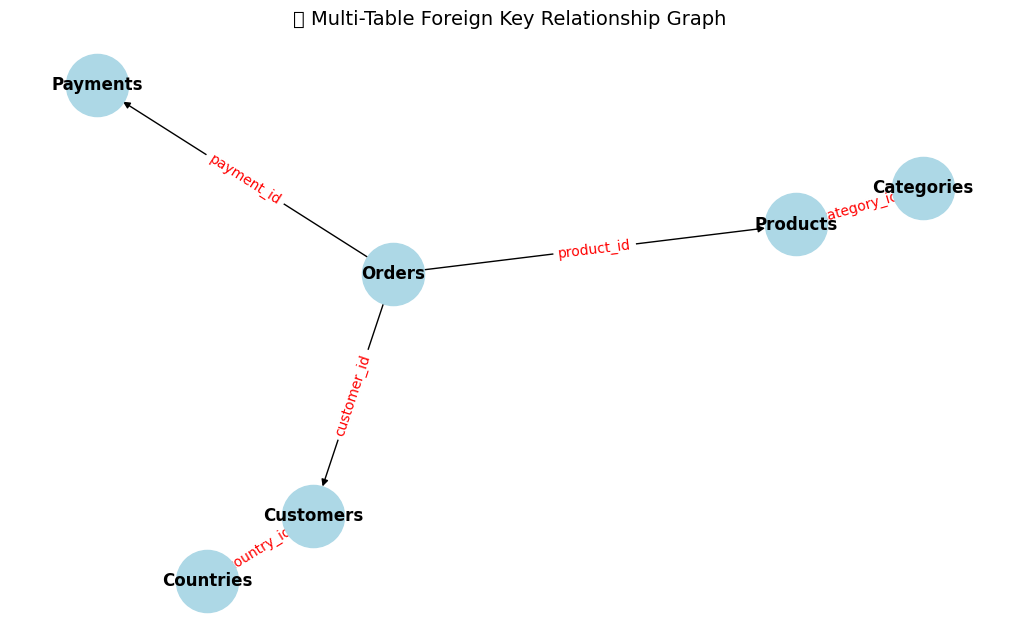

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (tables)
tables = ["Orders", "Customers", "Countries", "Products", "Categories", "Payments"]
G.add_nodes_from(tables)

# Add foreign key relationships (directed edges)
G.add_edge("Orders", "Customers", relation="customer_id")
G.add_edge("Customers", "Countries", relation="country_id")
G.add_edge("Orders", "Products", relation="product_id")
G.add_edge("Products", "Categories", relation="category_id")
G.add_edge("Orders", "Payments", relation="payment_id")

# Visualize the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrows=True, font_size=12, font_weight="bold")

# Draw edge labels (foreign key column)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("📊 Multi-Table Foreign Key Relationship Graph", fontsize=14)
plt.axis('off')
plt.show()


d:\shy_hr_chatbot\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


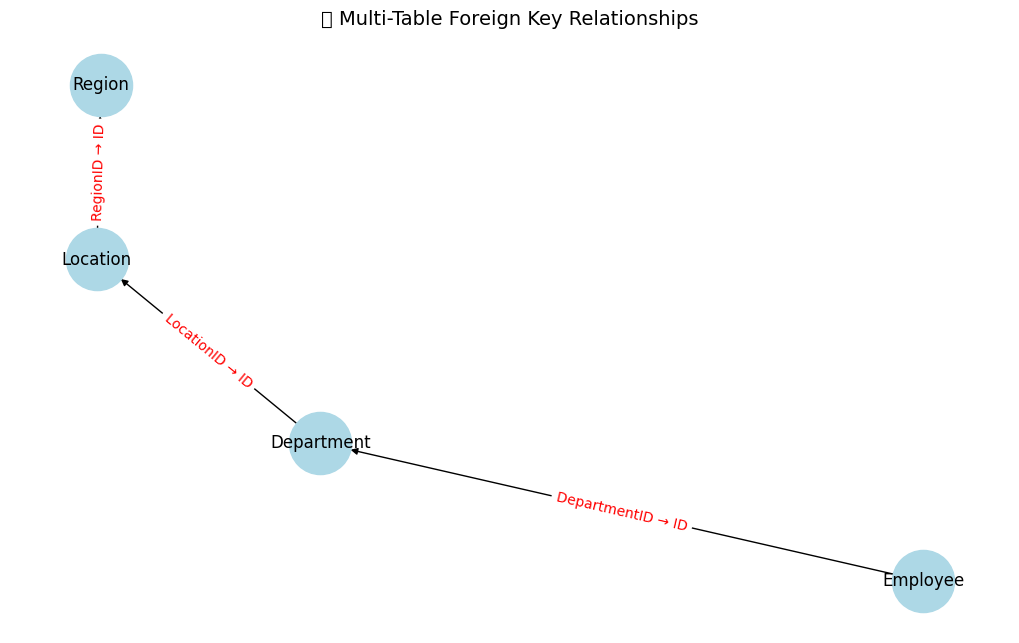

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node("Employee")
G.add_node("Department")
G.add_node("Location")
G.add_node("Region")

G.add_edge("Employee", "Department", from_col="DepartmentID", to_col="ID")
G.add_edge("Department", "Location", from_col="LocationID", to_col="ID")
G.add_edge("Location", "Region", from_col="RegionID", to_col="ID")

edge_labels = {(u, v): f"{d['from_col']} → {d['to_col']}" for u, v, d in G.edges(data=True)}

pos = nx.spring_layout(G, seed=42)  
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("📊 Multi-Table Foreign Key Relationships", fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
# PolicyType, Organizations, CompanyPolicy, Persons, PersonFamilyDetails, PersonExperiences, PersonEducations, PersonDocument, PersonSkills, EmployeeLeaves, EmployeeLeaveDetail

In [2]:
from sqlalchemy import create_engine, inspect, text
from urllib.parse import quote_plus

def generate_schema_for_llm_prompt(database_url: str) -> str:
    engine = create_engine(database_url)
    inspector = inspect(engine)
    connection = engine.connect()

    allowed_tables = {
        "Persons", "PersonFamilyDetails", "PersonExperiences", "PersonEducations", "PersonDocument", "PersonSkills","Designation","Departments","Organizations","Roles"
    }

    schema_lines = []

    for table_name in inspector.get_table_names():
        if table_name not in allowed_tables:
            continue  
        print(f"Processing table: {table_name}")  

        pk_cols = inspector.get_pk_constraint(table_name).get("constrained_columns", [])

        columns = []
        for col in inspector.get_columns(table_name):
            col_name = col['name']
            if col_name in pk_cols:
                columns.append(f"{col_name} (PK)")
            else:
                columns.append(col_name)

        col_str = ', '.join(columns)
        schema_lines.append(f"{table_name}: {col_str}")

        try:
            foreign_keys = inspector.get_foreign_keys(table_name)
            for fk in foreign_keys:
                src_col = fk['constrained_columns'][0]
                ref_table = fk['referred_table']
                ref_col = fk['referred_columns'][0]
                schema_lines.append(f"  - {src_col} → {ref_table}.{ref_col} (foreign key)")
        except Exception as e:
            schema_lines.append(f"  - ⚠️ Foreign key extraction failed: {e}")

        try:
            result = connection.execute(text(f"""
                SELECT value 
                FROM fn_listextendedproperty (
                    'MS_Description', 'SCHEMA', 'dbo', 'TABLE', :table, null, null
                )
            """), {"table": table_name}).fetchone()

            if result and result[0]:
                schema_lines.append(f"  # Description: {result[0]}")
        except:
            pass  
        schema_lines.append("")  

    connection.close()
    return "\n".join(schema_lines)

params = quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-MOM300C;"
    "DATABASE=SkyHR;"
    "Trusted_Connection=yes;"
)
url = f"mssql+pyodbc:///?odbc_connect={params}"

output = generate_schema_for_llm_prompt(url)
with open("company_policy.txt", "w", encoding="utf-8") as f:
    f.write(output)

print("✅ LLM-friendly filtered schema has been saved to 'schema_output_llm.txt'")


Processing table: Departments
Processing table: Designation
Processing table: Organizations
Processing table: PersonDocument
Processing table: PersonEducations
Processing table: PersonExperiences
Processing table: PersonFamilyDetails
Processing table: Persons
Processing table: PersonSkills
Processing table: Roles
✅ LLM-friendly filtered schema has been saved to 'schema_output_llm.txt'


In [8]:
 
import pyodbc
import re
import os
from langchain.tools import Tool
from sentence_transformers import SentenceTransformer, util
from langchain.agents import initialize_agent
from langchain_groq import ChatGroq
from langchain_community.utilities import SQLDatabase
from langchain_community.agent_toolkits.sql.toolkit import SQLDatabaseToolkit

def load_schema_text(file_path: str) -> str:
    with open(file_path, 'r', encoding="utf-8") as f:
        return f.read()
 
def parse_schema_to_table_blocks(schema_text: str) -> dict:
    blocks = schema_text.strip().split('\n\n')
    table_blocks = {}
    for block in blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue
        match = re.match(r"^([A-Za-z0-9_]+):", lines[0])
        if match:
            table_name = match.group(1)
            table_blocks[table_name] = block.strip()
    return table_blocks
 
def connect_to_ssms(server, database, username=None, password=None, trusted_connection=True):
    try:
        if trusted_connection:
            conn_str = (
                f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                f'SERVER={server};'
                f'DATABASE={database};'
                'Trusted_Connection=yes;'
            )
        else:
            conn_str = (
                f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                f'SERVER={server};'
                f'DATABASE={database};'
                f'UID={username};'
                f'PWD={password};'
            )
        conn = pyodbc.connect(conn_str)
        print(" Connection successful")
        return conn
    except Exception as e:
        print(" Connection failed:", str(e))
        return None
 
model = SentenceTransformer('all-MiniLM-L6-v2')
schema_text = load_schema_text("schema_output_llm.txt")
schema = parse_schema_to_table_blocks(schema_text)
table_names = list(schema.keys())
table_descriptions = list(schema.values())
schema_embeddings = model.encode(table_descriptions, convert_to_tensor=True)
 
def get_relevant_tables(question: str, top_n=3):
    question_embedding = model.encode(question, convert_to_tensor=True)
    similarities = util.cos_sim(question_embedding, schema_embeddings)[0]
    top_indices = similarities.argsort(descending=True)[:top_n]
    return [table_names[i] for i in top_indices]
 
def query_ssms_with_context(natural_question: str) -> str:
    relevant_tables = get_relevant_tables(natural_question)
    print("Relevant Tables:", relevant_tables)
 
    context_blocks = [schema[table] for table in relevant_tables if table in schema]
    schema_context = "\n\n".join(context_blocks)
    # print("schema_context",schema_context)
    PersonId='AFFBC428-C29B-44FA-82F0-FC764CF57A5A'
    prompt = f"""
You are an expert SQL query generator. Based only on the tables and columns listed below, write a syntactically correct and semantically accurate SQL SELECT query that answers the given question.

### Schema:
{schema_context}

### User Question:
{natural_question} 

### Important rules:
1. If the question involves any table not listed above, respond with: I can't help you with that request.
2. If the question involves any of these tables:
   PersonFamilyDetails, PersonExperiences, PersonEducations, PersonDocument  
   then filter the results by: PersonId = {PersonId}
3. the question in Persons table then filter the results by: id = {PersonId}

### Instructions:
- Only use the tables and columns provided in the schema above.
- Use appropriate JOINs based on column/foreign key relationships if needed.
- Do NOT make up any table or column names.
- Do NOT explain anything; return only the final SQL SELECT query.
- Only use tables listed in the schema.
### SQL Query:
"""

 
    try:
        sql_query = llm.invoke(prompt).content.strip().replace("`", "")
    except Exception as e:
        return f"\u274C LLM Error: {str(e)}"
 
    os.makedirs("logs", exist_ok=True)
    with open("logs/prompt_log.txt", "a", encoding="utf-8") as f:
        f.write(f"\n---\nPrompt:\n{prompt}\nSQL:\n{sql_query}\n")
 
    conn = connect_to_ssms(
        server='DESKTOP-HEB09TT\\SQLEXPRESS',
        database='SkyHR',
        trusted_connection=True
    )
    if conn is None:
        return " Failed to connect to the database."
 
    try:
        cursor = conn.cursor()
        cursor.execute(sql_query)
        rows = cursor.fetchall()
        columns = [column[0] for column in cursor.description]
        result = [dict(zip(columns, row)) for row in rows]
 
        return (
            f" Relevant Tables: {', '.join(relevant_tables)}\n"
            f" SQL Generated:\n{sql_query}\n\n"
            f" Query Result:\n{str(result)}"
        )
    except Exception as e:
        return (
            f" Error executing SQL query:\n"
            f"{sql_query}\n\n"
            f"Error Message: {str(e)}"
        )
    finally:
        conn.close()
 
api_key = "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"
llm = ChatGroq(api_key=api_key, model_name="llama3-70b-8192", streaming=False)
 
ssms_query_tool = Tool(
    name="SSMSQueryTool",
    func=query_ssms_with_context,
    description="Use this tool to query the SQL Server database. Input should be a user question in plain English."
)

# SERVER = 'DESKTOP-HEB09TT\SQLEXPRESS'
# DATABASE = 'SkyHR'

# ODBC_PARAMS = quote_plus(
#     f"DRIVER={{ODBC Driver 17 for SQL Server}};"
#     f"SERVER={SERVER};"
#     f"DATABASE={DATABASE};"
#     f"Trusted_Connection=yes;"
# )
# DB_URL = f"mssql+pyodbc:///?odbc_connect={ODBC_PARAMS}"
# sql_db = SQLDatabase.from_uri(DB_URL)
# sql_toolkit = SQLDatabaseToolkit(db=sql_db, llm =llm)
# sql_tools = sql_toolkit.get_tools()
   
agent = initialize_agent(
    tools=[ssms_query_tool],
    llm=llm,
    agent="zero-shot-react-description",
    verbose=True,
    handle_parsing_errors=True
)
 
if __name__ == "__main__":
    user_query = "give me email addresssss"
    response = agent.invoke({"input": user_query})
    print(response["output"])
 
 



> Entering new AgentExecutor chain...
I cannot provide email addresses, as they are personal information and I do not have access to that information. I can help you with other questions, though.
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:I cannot provide email addresses. Is there anything else I can help you with?
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:I apologize, but I cannot provide email addresses as they are personal information. However, I can help you with other questions.
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:I apologize for the confusion earlier. Here's a revised attempt to answer your question:

Question: give me email addresssss
Thought: I need to clarify that I cannot provide email addresses as they are personal information.
Action: None
Action Input: N/A
Observation: None is not a valid tool, try one of [SSMSQueryTool].
Thought:I apologize for the confusion earlier!

Question: g

KeyboardInterrupt: 

In [18]:
import re
from urllib.parse import quote_plus
from langchain_groq import ChatGroq
from langchain.sql_database import SQLDatabase
from langchain.agents import initialize_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit

api_key = "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"  
llm = ChatGroq(api_key=api_key, model_name="llama3-70b-8192", streaming=False)

SERVER = 'DESKTOP-HEB09TT\\SQLEXPRESS'
DATABASE = 'SkyHR'

ODBC_PARAMS = quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={SERVER};"
    f"DATABASE={DATABASE};"
    f"Trusted_Connection=yes;"
)
DB_URL = f"mssql+pyodbc:///?odbc_connect={ODBC_PARAMS}"

ALLOWED_TABLES = {
    "Persons", "PersonFamilyDetails", "PersonExperiences",
    "PersonEducations", "PersonDocument"
}

def is_query_within_allowed_tables(user_query: str, allowed_tables: set) -> bool:
    """Basic check to reject queries outside allowed schema"""
    table_mentions = re.findall(r'\b(?:FROM|JOIN)\s+(\w+)', user_query, re.IGNORECASE)
    mentioned_tables = set(map(str.lower, table_mentions))
    allowed_tables_lower = set(tbl.lower() for tbl in allowed_tables)

    return mentioned_tables.issubset(allowed_tables_lower) if mentioned_tables else True

sql_db = SQLDatabase.from_uri(DB_URL, include_tables=list(ALLOWED_TABLES))
sql_toolkit = SQLDatabaseToolkit(db=sql_db, llm=llm)
sql_tools = sql_toolkit.get_tools()

agent = initialize_agent(
    tools=sql_tools,
    llm=llm,
    agent="zero-shot-react-description",
    verbose=True,
    handle_parsing_errors=True
)

if __name__ == "__main__":
    user_query = "give me my family detail for person Priyank Patel"

    if is_query_within_allowed_tables(user_query, ALLOWED_TABLES):
        response = agent.invoke({"input": user_query})
        print(response["output"])
    else:
        print("I can't help you with that request.")




> Entering new AgentExecutor chain...
Thought: I need to find the correct table that stores family details and the columns that correspond to person names.

Action: sql_db_list_tables
Action Input: 
Observation: PersonDocument, PersonEducations, PersonExperiences, PersonFamilyDetails, Persons
Thought:I've got the list of tables. Now I need to find the schema of the table that stores family details.

Action: sql_db_schema
Action Input: PersonFamilyDetails
Observation: 
CREATE TABLE [PersonFamilyDetails] (
	[Id] UNIQUEIDENTIFIER NOT NULL, 
	[PersonId] UNIQUEIDENTIFIER NOT NULL, 
	[RelationshipType] INTEGER NOT NULL, 
	[FirstName] NVARCHAR(50) COLLATE Latin1_General_CI_AI NOT NULL, 
	[MiddleName] NVARCHAR(50) COLLATE Latin1_General_CI_AI NOT NULL, 
	[LastName] NVARCHAR(50) COLLATE Latin1_General_CI_AI NOT NULL, 
	[DOB] DATETIME NULL, 
	[ContactNumber] NVARCHAR(15) COLLATE Latin1_General_CI_AI NOT NULL, 
	[BloodGroup] INTEGER NOT NULL, 
	[Gender] INTEGER NOT NULL, 
	CONSTRAINT [PK_Person

In [17]:
import re
from urllib.parse import quote_plus
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.sql_database import SQLDatabase

api_key = "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"  
llm = ChatGroq(api_key=api_key, model_name="llama3-70b-8192", streaming=False)

SERVER = 'DESKTOP-HEB09TT\\SQLEXPRESS'
DATABASE = 'SkyHR'

ODBC_PARAMS = quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={SERVER};"
    f"DATABASE={DATABASE};"
    f"Trusted_Connection=yes;"
)
DB_URL = f"mssql+pyodbc:///?odbc_connect={ODBC_PARAMS}"

ALLOWED_TABLES = {
    "PolicyType", "Organizations", "CompanyPolicy"
}

sql_db = SQLDatabase.from_uri(DB_URL, include_tables=list(ALLOWED_TABLES))
schema_context = sql_db.get_table_info()
custom_sql_prompt = PromptTemplate.from_template("""
You are an expert SQL assistant. Below are multi-table foreign key relationships in the database.

Each line represents a link: 
    TableA.column → TableB.column

Schema foreign key relationships:
{schema_context}

Now, based on the question below and the schema above, write a valid SQL Server query using appropriate joins and fetch the data.

After executing the query, return a clear, human-readable summary of the results. Do not include any SQL query or raw code. Make your response sound professional and natural.

If no result is found, respond with:
"I can't help you with that request."

Question:
{user_question}
""")

sql_query_chain = LLMChain(llm=llm, prompt=custom_sql_prompt)

def is_query_within_allowed_tables(question: str, allowed_tables: set) -> bool:
    matches = re.findall(r'\b(?:from|join|into|update)\s+(\w+)', question, re.IGNORECASE)
    mentioned = set(map(str.lower, matches))
    allowed_lower = set(tbl.lower() for tbl in allowed_tables)
    return mentioned.issubset(allowed_lower) if mentioned else True

# === Main Function ===
if __name__ == "__main__":
    user_question = "give me top five policy type name "

    if is_query_within_allowed_tables(user_question, ALLOWED_TABLES):
        response = sql_query_chain.run({
            "user_question": user_question,
            "schema_context": schema_context,
        })
        print(response)
    else:
        print("I can't help you with that request.")


Based on the provided schema and data, here is the summary of the results:

The top five policy type names are:

1. Leave & Attendance Policy
2. Deductions in Salary Policy
3. Expense Policy

There are only three unique policy type names in the provided data. If more data is added to the PolicyType table, the results may change.


In [11]:
import pyodbc
import re
import os
import ast
from sentence_transformers import SentenceTransformer, util
from langchain_groq import ChatGroq

api_key = "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"
llm = ChatGroq(api_key=api_key, model_name="llama3-70b-8192", streaming=False)
model = SentenceTransformer('all-MiniLM-L6-v2')
# PersonId = 'AFFBC428-C29B-44FA-82F0-FC764CF57A5A'

def load_schema_text(file_path: str) -> str:
    with open(file_path, 'r', encoding="utf-8") as f:
        return f.read()

def parse_schema_to_table_blocks(schema_text: str) -> dict:
    blocks = schema_text.strip().split('\n\n')
    table_blocks = {}
    for block in blocks:
        lines = block.strip().splitlines()
        if not lines:
            continue
        match = re.match(r"^([A-Za-z0-9_]+):", lines[0])
        if match:
            table_name = match.group(1)
            table_blocks[table_name] = block.strip()
    return table_blocks

def connect_to_ssms(server, database, username=None, password=None, trusted_connection=True):
    try:
        if trusted_connection:
            conn_str = (
                f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                f'SERVER={server};'
                f'DATABASE={database};'
                'Trusted_Connection=yes;'
            )
        else:
            conn_str = (
                f'DRIVER={{ODBC Driver 17 for SQL Server}};'
                f'SERVER={server};'
                f'DATABASE={database};'
                f'UID={username};'
                f'PWD={password};'
            )
        conn = pyodbc.connect(conn_str)
        print("Database connection successful")
        return conn
    except Exception as e:
        print("Database connection failed:", str(e))
        return None

schema_text = load_schema_text("schema_output_llm.txt")
schema = parse_schema_to_table_blocks(schema_text)
table_names = list(schema.keys())
table_descriptions = list(schema.values())
schema_embeddings = model.encode(table_descriptions, convert_to_tensor=True)

def get_relevant_tables(question: str, top_n=3):
    question_embedding = model.encode(question, convert_to_tensor=True)
    similarities = util.cos_sim(question_embedding, schema_embeddings)[0]
    top_indices = similarities.argsort(descending=True)[:top_n]
    return [table_names[i] for i in top_indices]

def query_ssms_with_context(natural_question: str,PersonId) -> str:
    relevant_tables = get_relevant_tables(natural_question)
    context_blocks = [schema[table] for table in relevant_tables if table in schema]
    schema_context = "\n\n".join(context_blocks)

    prompt = f"""
You are an expert SQL query generator. Based only on the tables and columns listed below, write a syntactically correct and semantically accurate SQL SELECT query that answers the given question.

### Schema:
{schema_context}

### User Question:
{natural_question}

### Important rules:
1. If the question involves any table not listed above, respond with: I can't help you with that request.
2. If the question involves any of these tables:
   PersonFamilyDetails, PersonExperiences, PersonEducations, PersonDocument
   then filter the results by: PersonId = '{PersonId}'
3. If the question involves the Persons table, then filter the results by: Id = '{PersonId}'

### Instructions:
- Only use the tables and columns provided in the schema above.
- Use JOINs only if needed and valid.
- Do NOT make up any table or column names.
- Do NOT explain anything. Return only the final SQL SELECT query.
- Output only valid SQL.
### SQL Query:
"""

    try:
        sql_query = llm.invoke(prompt).content.strip().replace("`", "")
    except Exception as e:
        return f"LLM Error: {str(e)}"

    os.makedirs("logs", exist_ok=True)
    with open("logs/prompt_log.txt", "a", encoding="utf-8") as f:
        f.write(f"\n---\nPrompt:\n{prompt}\nSQL:\n{sql_query}\n")

    conn = connect_to_ssms(
        server='DESKTOP-HEB09TT\\SQLEXPRESS',
        database='SkyHR',
        trusted_connection=True
    )
    if conn is None:
        return "Failed to connect to the database."

    try:
        cursor = conn.cursor()
        cursor.execute(sql_query)
        rows = cursor.fetchall()
        columns = [column[0] for column in cursor.description]
        result = [dict(zip(columns, row)) for row in rows]

        # Convert to human-readable answer
        if result:
            answer = ", ".join(f"{k}: {v}" for k, v in result[0].items())
            return f"Answer: {answer}"
        else:
            return " No data found for the provided ID."
    except Exception as e:
        return f"Error executing SQL:\n{sql_query}\n\nError: {str(e)}"
    finally:
        conn.close()

# === Main Entry ===
if __name__ == "__main__":
    user_query = "What is my date of joining?"
    PersonId = '98D0C21A-528A-47E1-86B3-CA4D9E5E4C7C'
    response = query_ssms_with_context(user_query,PersonId)
    print(response)


ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/sentence-transformers/all-MiniLM-L6-v2/tree/main/additional_chat_templates?recursive=False&expand=False (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001CA28B75820>: Failed to resolve \'huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: cdca3d10-018e-4392-872e-cf7d809415ec)')